In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

Showing first 5 rows of data

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


shows datatypes and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


shows summary statitics for numeric columns

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# counts how many empty entries are there
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Fill missing ages with median age (avoids bias from extreme ages)
df['Age']=df['Age'].fillna(df['Age'].median())

In [9]:
# Fills missing values of embarked by taking most common using mode() and [0] is for taking whichever comes first to rule out a tie.
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
# Removes column named cabin from table as too values are missing
# axis=1 means column and axis=0 means row
df.drop('Cabin', axis=1, inplace=True)

In [11]:
# Drops any duplicate rows that exists in the Data Frame
df.drop_duplicates(inplace=True)

In [12]:
# Check how many rows remain (rows, col)
print(df.shape)

(891, 11)


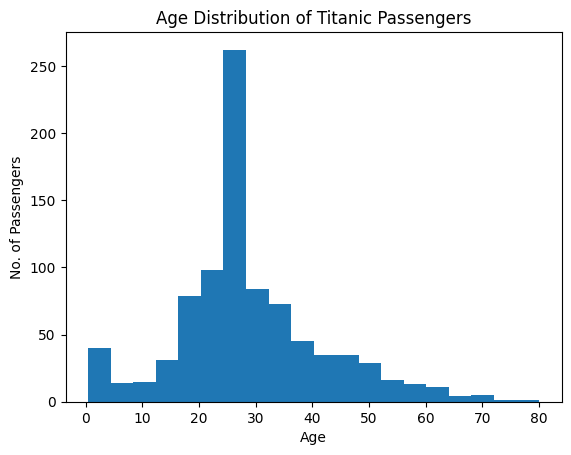

In [13]:
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.title('Age Distribution of Titanic Passengers')
plt.show()

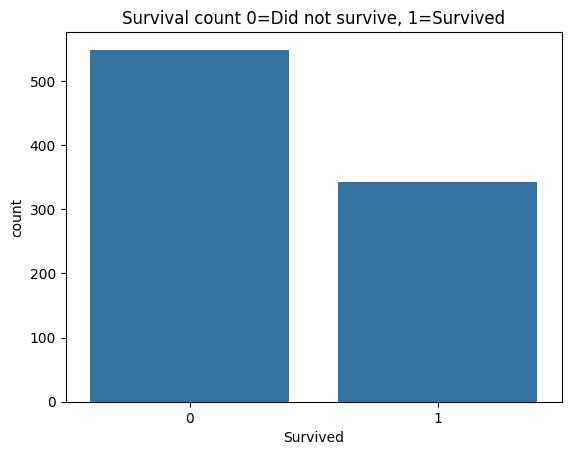

In [14]:
sns.countplot(x='Survived', data=df)
plt.title('Survival count 0=Did not survive, 1=Survived')
plt.show()

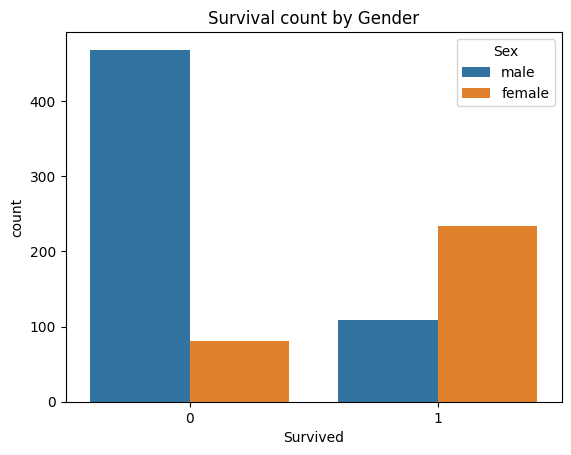

In [15]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival count by Gender')
plt.show()

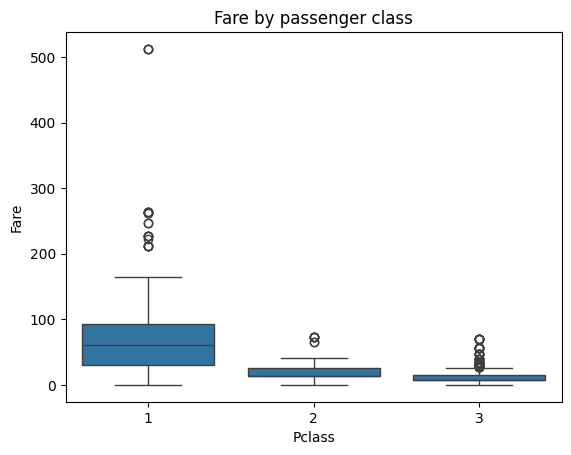

In [16]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by passenger class')
plt.show()

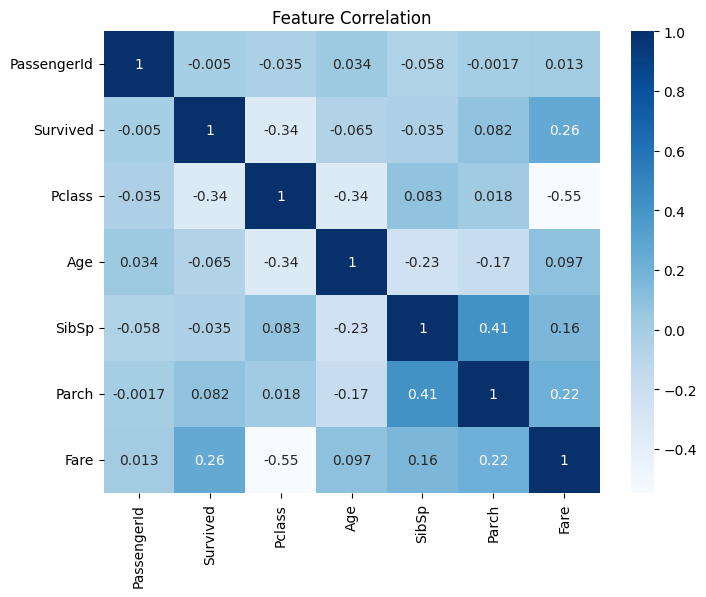

In [17]:
plt.figure(figsize=(8,6))
numeric_df=df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation')
plt.show()

In [18]:
df['Familysize']=df['SibSp']+df['Parch']+1

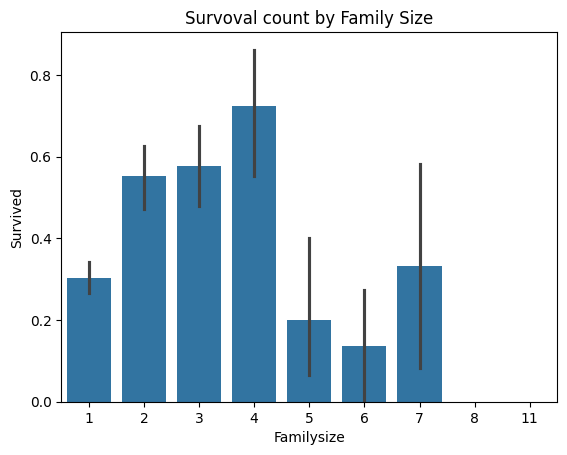

In [19]:
sns.barplot(x='Familysize', y='Survived', data=df)
plt.title('Survoval count by Family Size')
plt.show()